In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
%run src/foveation_utils.py

In [10]:
keehar_plaintext_rgb  = cv2.imread("input/text/images/keehar-plaintext.png", cv2.IMREAD_COLOR)
keehar_plaintext_grayscale = cv2.cvtColor(keehar_plaintext_rgb, cv2.COLOR_BGR2GRAY)
keehar_plaintext_lab = cv2.cvtColor(keehar_plaintext_rgb, cv2.COLOR_BGR2LAB)
keehar_plaintext_rgb_channels = cv2.split(keehar_plaintext_rgb)
keehar_plaintext_lab_channels = cv2.split(keehar_plaintext_lab)

rgb_colours = ('b', 'g', 'r')

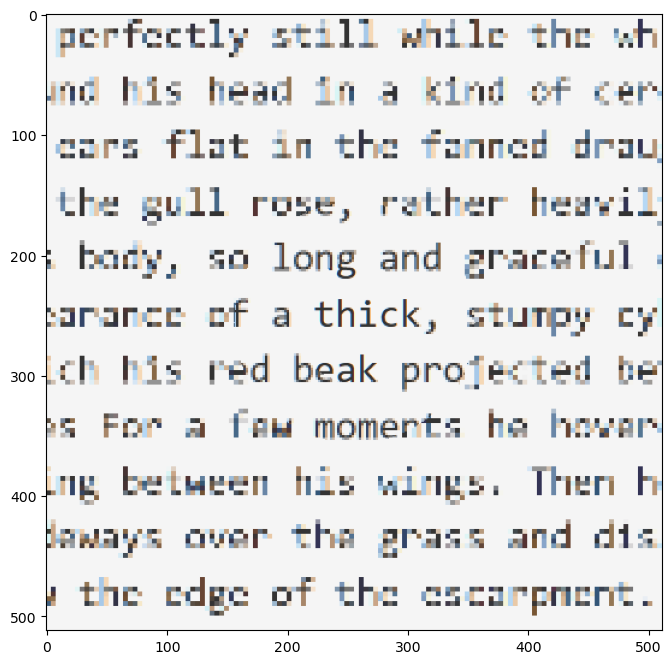

In [14]:
center = (keehar_plaintext_rgb.shape[0] // 2, keehar_plaintext_rgb.shape[1] // 2)
radii = [50, 100]
foveated_keehar_plaintext_rgb = guenter_foveated_rendering_px(keehar_plaintext_rgb, center, radii)

(fig, ax) = plt.subplots(figsize = (8, 8))

ax.imshow(foveated_keehar_plaintext_rgb)